In [69]:
library(tidyverse)
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=14, repr.plot.height=10)

In [72]:
example_file = "../data/raw//1.0_1000.0_0.1_10.0_.csv"

parse_fname <- function(fname){
    substrings = str_split(fname, "_")[[1]]
    return(list(outflow = as.numeric(substrings[3]), forward = as.numeric(substrings[4]) ))
    }
parse_fname(example_file)

$outflow
[1] 0.1

$forward
[1] 10

In [73]:
example_run = read.csv(example_file)

In [74]:
head(example_run)
averages_data = example_run %>% 
    filter(variable %in% c("variance_lengths", "average_lengths", "molecule_count"))
head(averages_data)

,time,variable,value
,<dbl>,<chr>,<dbl>
1,28.003,variance_lengths,117.667
2,28.003,molecule_count,165.000
3,28.003,5,8.000
4,28.003,12,1.000
5,28.003,30,1.000
6,28.003,8,6.000


,time,variable,value
,<dbl>,<chr>,<dbl>
1,28.003,variance_lengths,117.667036
2,28.003,molecule_count,165.000000
3,28.003,average_lengths,6.060606
4,99.005,variance_lengths,106.889890
5,99.005,molecule_count,151.000000
6,99.005,average_lengths,6.622517


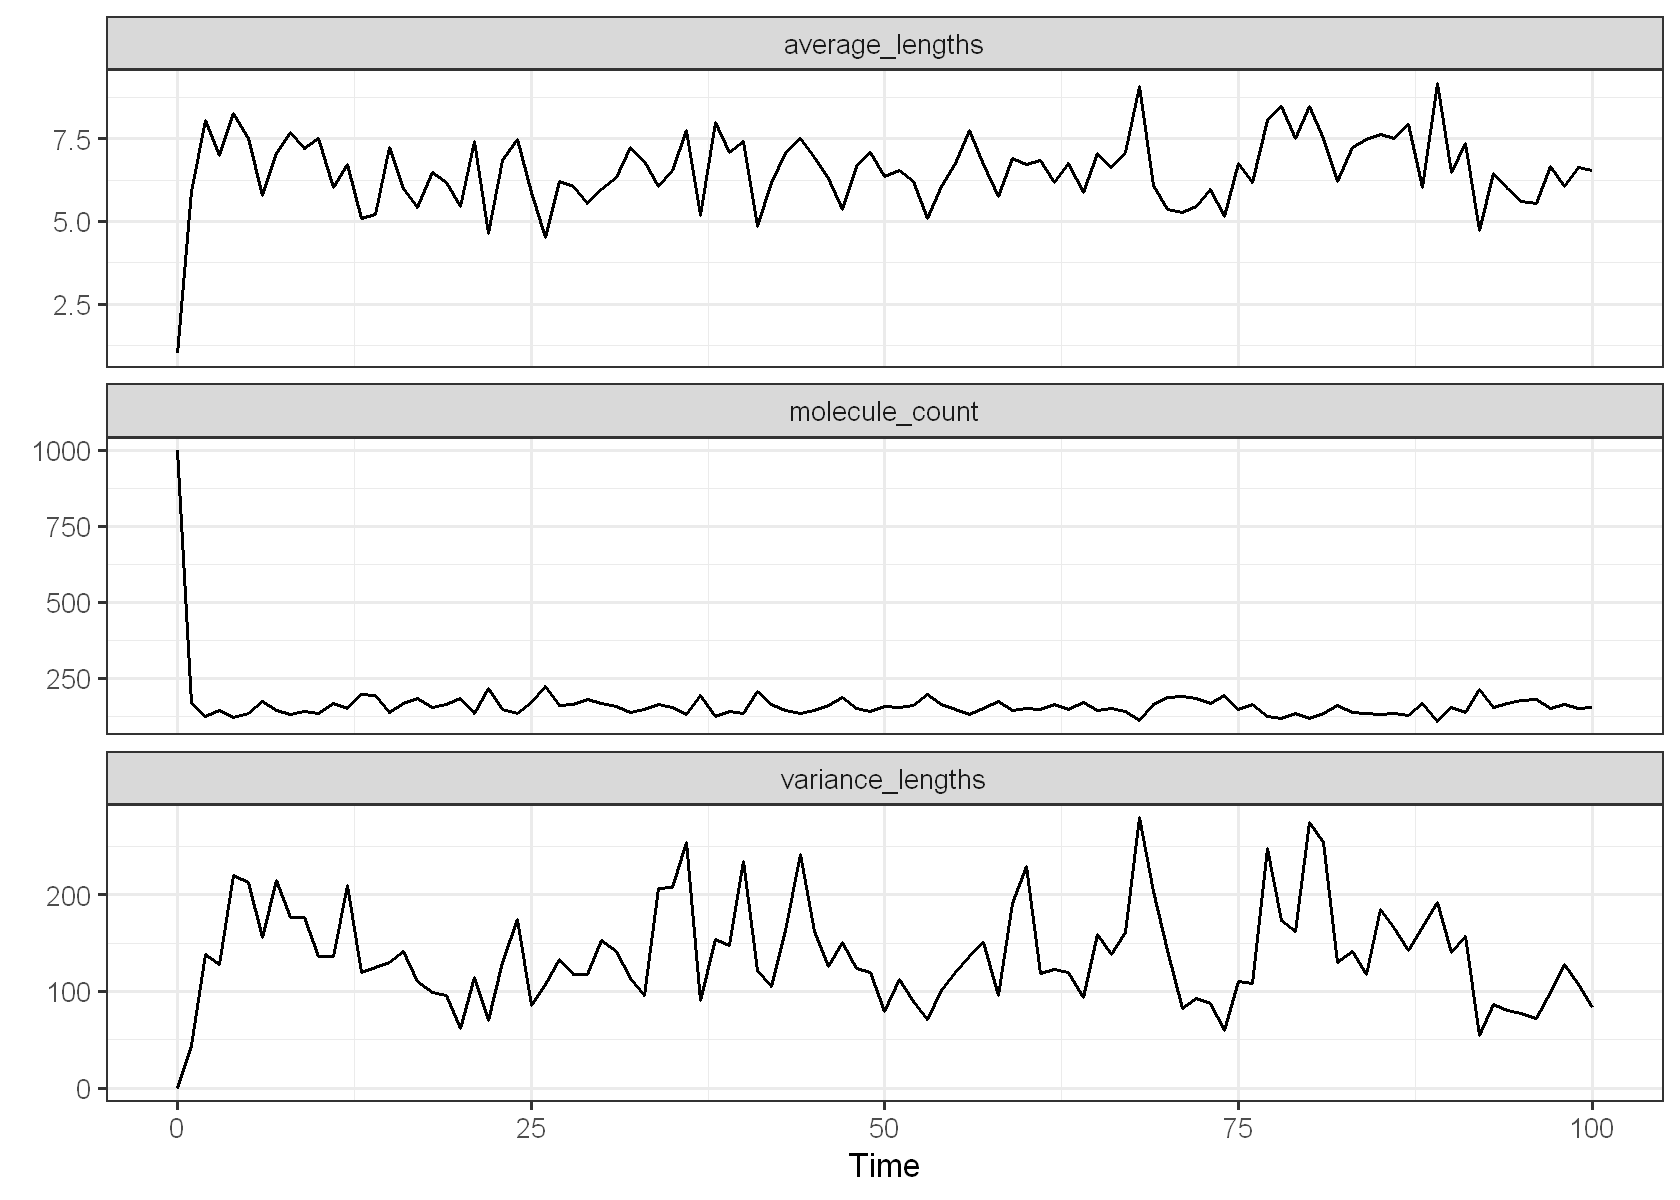

In [75]:
ggplot(averages_data, aes(x = time, y =value)) + 
    geom_line(size = 1.0) + 
    labs(x = "Time", y = element_blank()) + 
    facet_wrap(~variable, ncol = 1, scales = "free_y") + 
    theme_bw(base_size = 20)

In [32]:
averages_data %>% group_by(variable) %>% summarise(mean = mean(value), std =sqrt(var(value)) )

variable,mean,std
<chr>,<dbl>,<dbl>
average_lengths,6.530455,1.112922
molecule_count,163.554455,87.149466
variance_lengths,137.502251,52.651565


In [45]:
parse_file_to_averages <- function(fname){
    run_parameters = parse_fname(fname)
    all_data = read.csv(fname)
    average_data = all_data %>% 
                        filter(variable %in% c("variance_lengths", "average_lengths", "molecule_count")) %>%
                        filter(time > 10) %>%
                        group_by(variable) %>% 
                        summarise(mean = mean(value), std =sqrt(var(value)) )
    average_data$outflow = run_parameters$outflow
    average_data$forward = run_parameters$forward
    
    return(average_data)
    
}

In [46]:
parse_file_to_averages(example_file)

variable,mean,std,outflow,forward
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
average_lengths,6.528658,0.9646089,0.1,10
molecule_count,156.549451,23.5760065,0.1,10
variance_lengths,136.515890,50.2937692,0.1,10


In [47]:
all_files = Sys.glob("../data/raw/*.csv")

In [48]:
parameter_sweep = data.frame()

In [49]:
for (f in all_files){
    data = parse_file_to_averages(f)
    parameter_sweep = rbind(parameter_sweep, data)
}

In [50]:
head(parameter_sweep)

variable,mean,std,outflow,forward
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
average_lengths,1.02212409,0.01953329,0.1,1
molecule_count,978.70000000,18.27286931,0.1,1
variance_lengths,0.02430894,0.02249187,0.1,1
average_lengths,6.52865776,0.96460886,0.1,10
molecule_count,156.54945055,23.57600651,0.1,10
variance_lengths,136.51588998,50.29376916,0.1,10


In [51]:
average_length = parameter_sweep %>% filter(variable == "average_lengths")

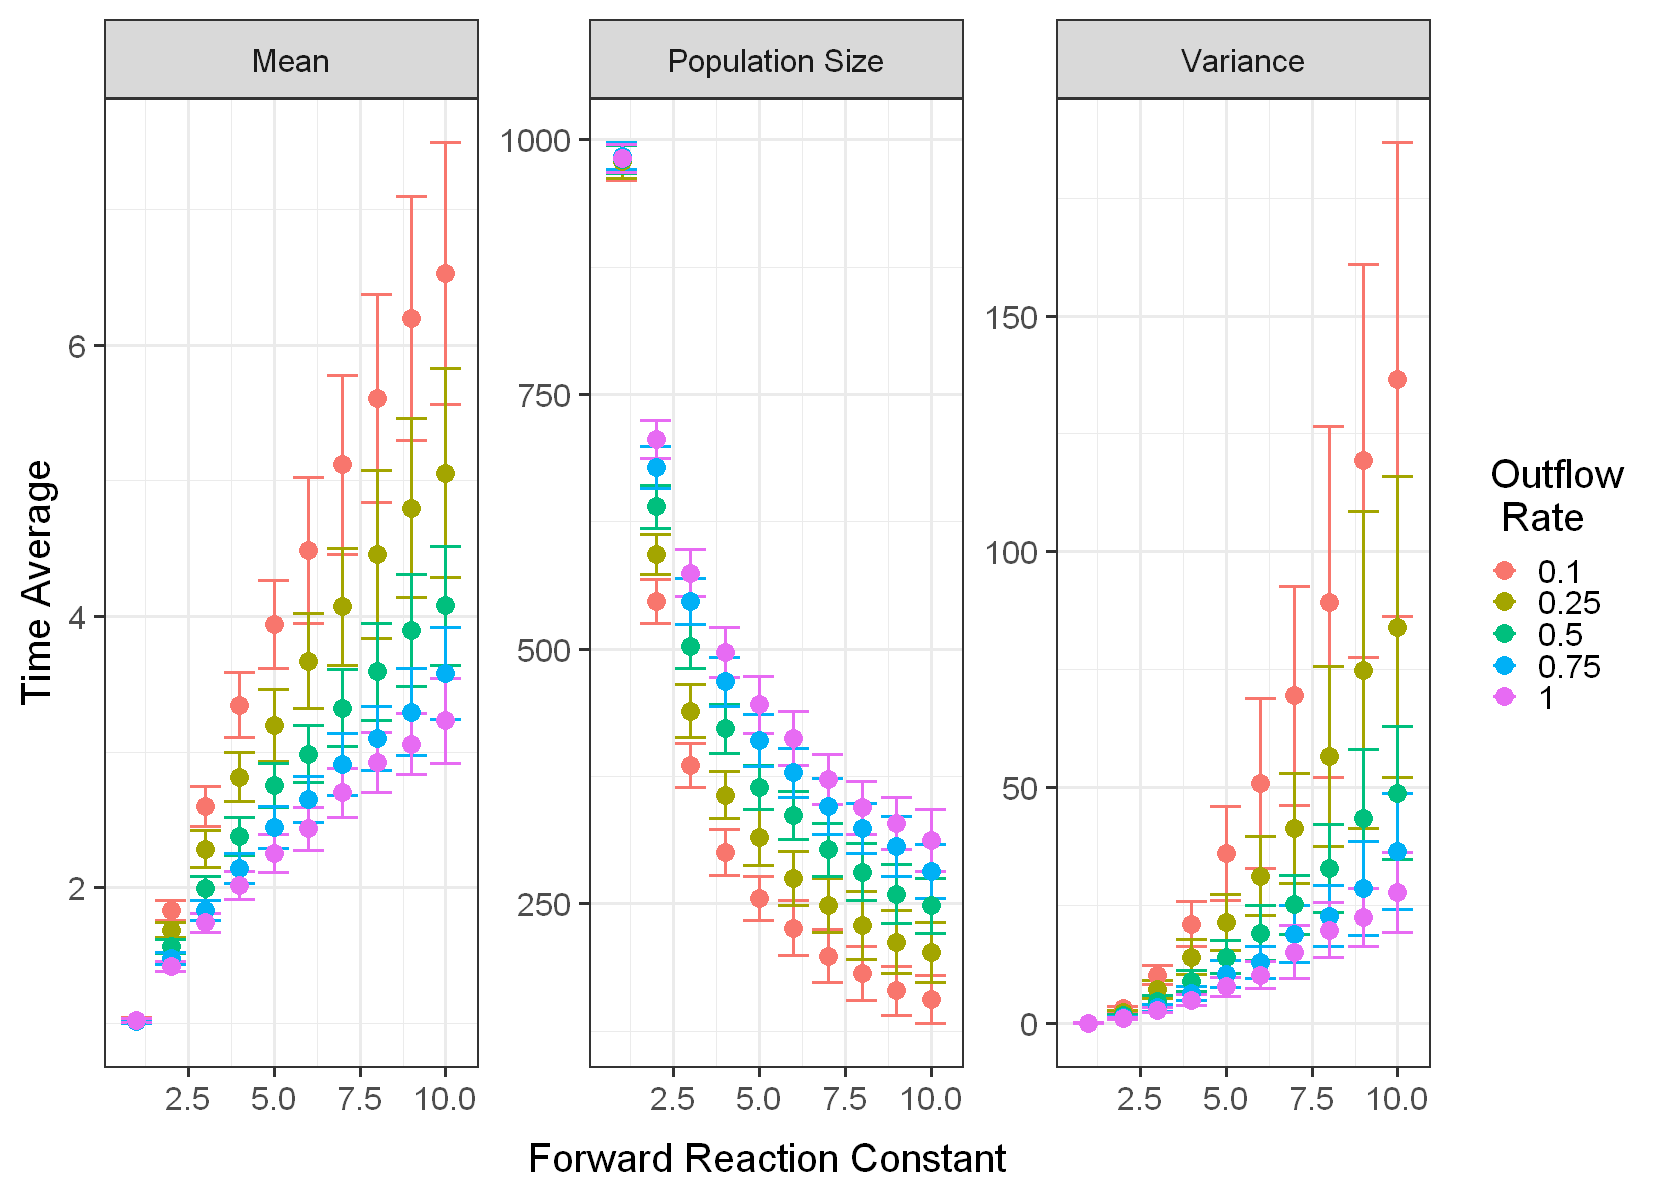

In [77]:
ggplot(parameter_sweep, aes(x = forward, y = mean)) + 
    geom_errorbar(size = 1.0, aes(ymin = mean - std, ymax = mean + std, color = as.factor(outflow)))  + 
    geom_point(size = 5.0, aes(color = as.factor(outflow)))  + 
    theme_bw(base_size = 24) + 
    labs(x = "Forward Reaction Constant", y ="Time Average", color = "Outflow \n Rate") +
    facet_wrap(~variable, 
                scale = "free", 
                labeller = labeller(variable = 
                    c("average_lengths" = "Mean",
                      "molecule_count" = "Population Size",
                      "variance_lengths" = "Variance")))